Root Mean Square Error (RMSE) for training: 0.9766967195322599
Root Mean Square Error (RMSE) for testing: 0.8422086106898057


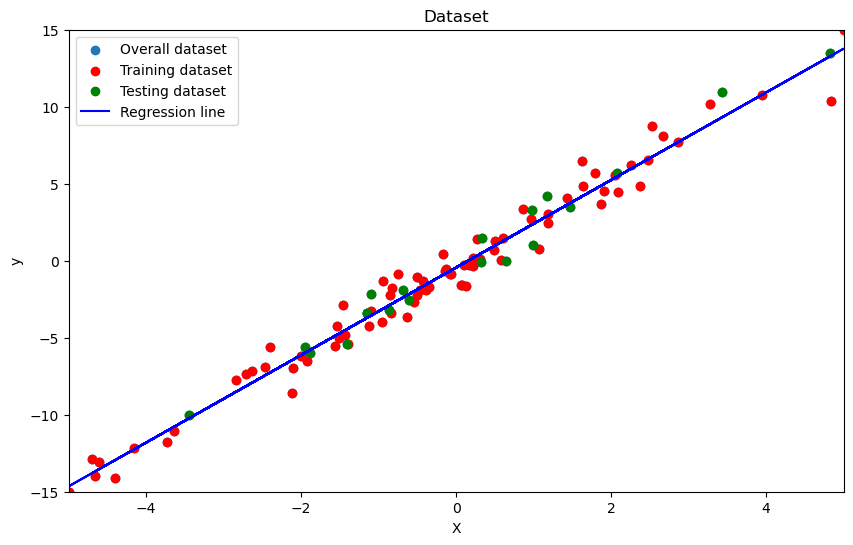

Intercept of the regression line: [-0.43997213]
Intercept using LinearRegression: [-0.43997213]
Coefficient of X in the regression line: [2.84197]
Coefficient using LinearRegression: [2.84197]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate regression dataset
X, y = make_regression(n_samples=100, n_features=1, noise=5, random_state=10)

# Define desired ranges for X and y
X_range = (-5, 5)
y_range = (-15, 15)

# Scale the dataset to the desired range using interpolation
X_scaled = np.interp(X, (X.min(), X.max()), X_range)
y_scaled = np.interp(y, (y.min(), y.max()), y_range)

# Reshape y to match the expected format for LinearRegression
y_scaled = y_scaled.reshape(-1, 1)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=10)

# Add bias to training data
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Calculate linear regression coefficients using closed-form solution
w_b = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Extract coefficients
w0, w1 = w_b[0], w_b[1]

# Predict using testing data
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]
y_pred_test = X_test_b.dot(w_b)

# Calculate RMSE for training and testing
rmse_train = np.sqrt(mean_squared_error(y_train, X_train_b.dot(w_b)))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Print RMSE
print("Root Mean Square Error (RMSE) for training:", rmse_train)
print("Root Mean Square Error (RMSE) for testing:", rmse_test)

# Plot the datasets
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled, y_scaled, label='Overall dataset')
plt.scatter(X_train, y_train, color='red', label='Training dataset')
plt.scatter(X_test, y_test, color='green', label='Testing dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Dataset')
plt.legend()

# Plot the regression line
plt.plot(X_scaled, X_scaled.dot(w1) + w0, color='blue', label='Regression line')
plt.xlim(X_range)
plt.ylim(y_range)
plt.legend()
plt.show()

# Verify results with LinearRegression from sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)

# Print intercept and coefficients
print("Intercept of the regression line:", w0)
print("Intercept using LinearRegression:", lr.intercept_)
print("Coefficient of X in the regression line:", w1)
print("Coefficient using LinearRegression:", lr.coef_[0])
